In [1]:
import ctypes
import logging
from PIL import Image, ImageDraw
#from observation_panel import get_observation_panel
from info_panel import get_info_panel
from forecast_panel import get_forecasts_panel
from celestial_panel import get_celestial_panel
from sensor_panel import get_sensor_panel
#from sensor_data import get_sensor_data
from timeit import default_timer as timer
from configparser import SectionProxy
from typing import Optional
from type_alias import Icons, Fonts
from multiprocessing import Process
from weather import get_observation_data, get_forecast_data, get_radiation_data
import log
import logging
import utils
from icons import get_weather_images
import configparser
import refresh
from inky.inky_uc8159 import Inky, DESATURATED_PALETTE, SATURATED_PALETTE




2022-08-28 00:05:26 - __main__ - INFO - App starting
2022-08-28 00:05:26 - __main__ - INFO - Reading config file "config.ini"
2022-08-28 00:05:26 - __main__ - INFO - Config: [('fmi_location', 'Copenhagen'), ('use_random_data', 'False'), ('draw_panel_borders', 'True'), ('draw_borders', 'True'), ('moon_icon_size', '120'), ('ruuvitag_mac_in', 'AA:BB:CC:DD:EE:FF'), ('ruuvitag_mac_out', 'AA:BB:CC:DD:EE:FF'), ('sensor_poll_timeout', '10000'), ('rotate_180', 'False'), ('mirror_horizontal', 'False'), ('epd_model', '10.3'), ('epd_voltage', '1370'), ('file_output', 'False'), ('output_filename', 'image.png'), ('bits_per_pixel', '1'), ('refresh_full_interval', '5'), ('refresh_partial_interval', '5'), ('high_temperature_warning_threshold', '25'), ('extreme_high_temperature_warning_threshold', '30'), ('low_temperature_warning_threshold', '-20'), ('extreme_low_temperature_warning_threshold', '-30'), ('tropical_night_temperature_warning_threshold', '20')]
2022-08-28 00:05:26 - icons - INFO - Importing

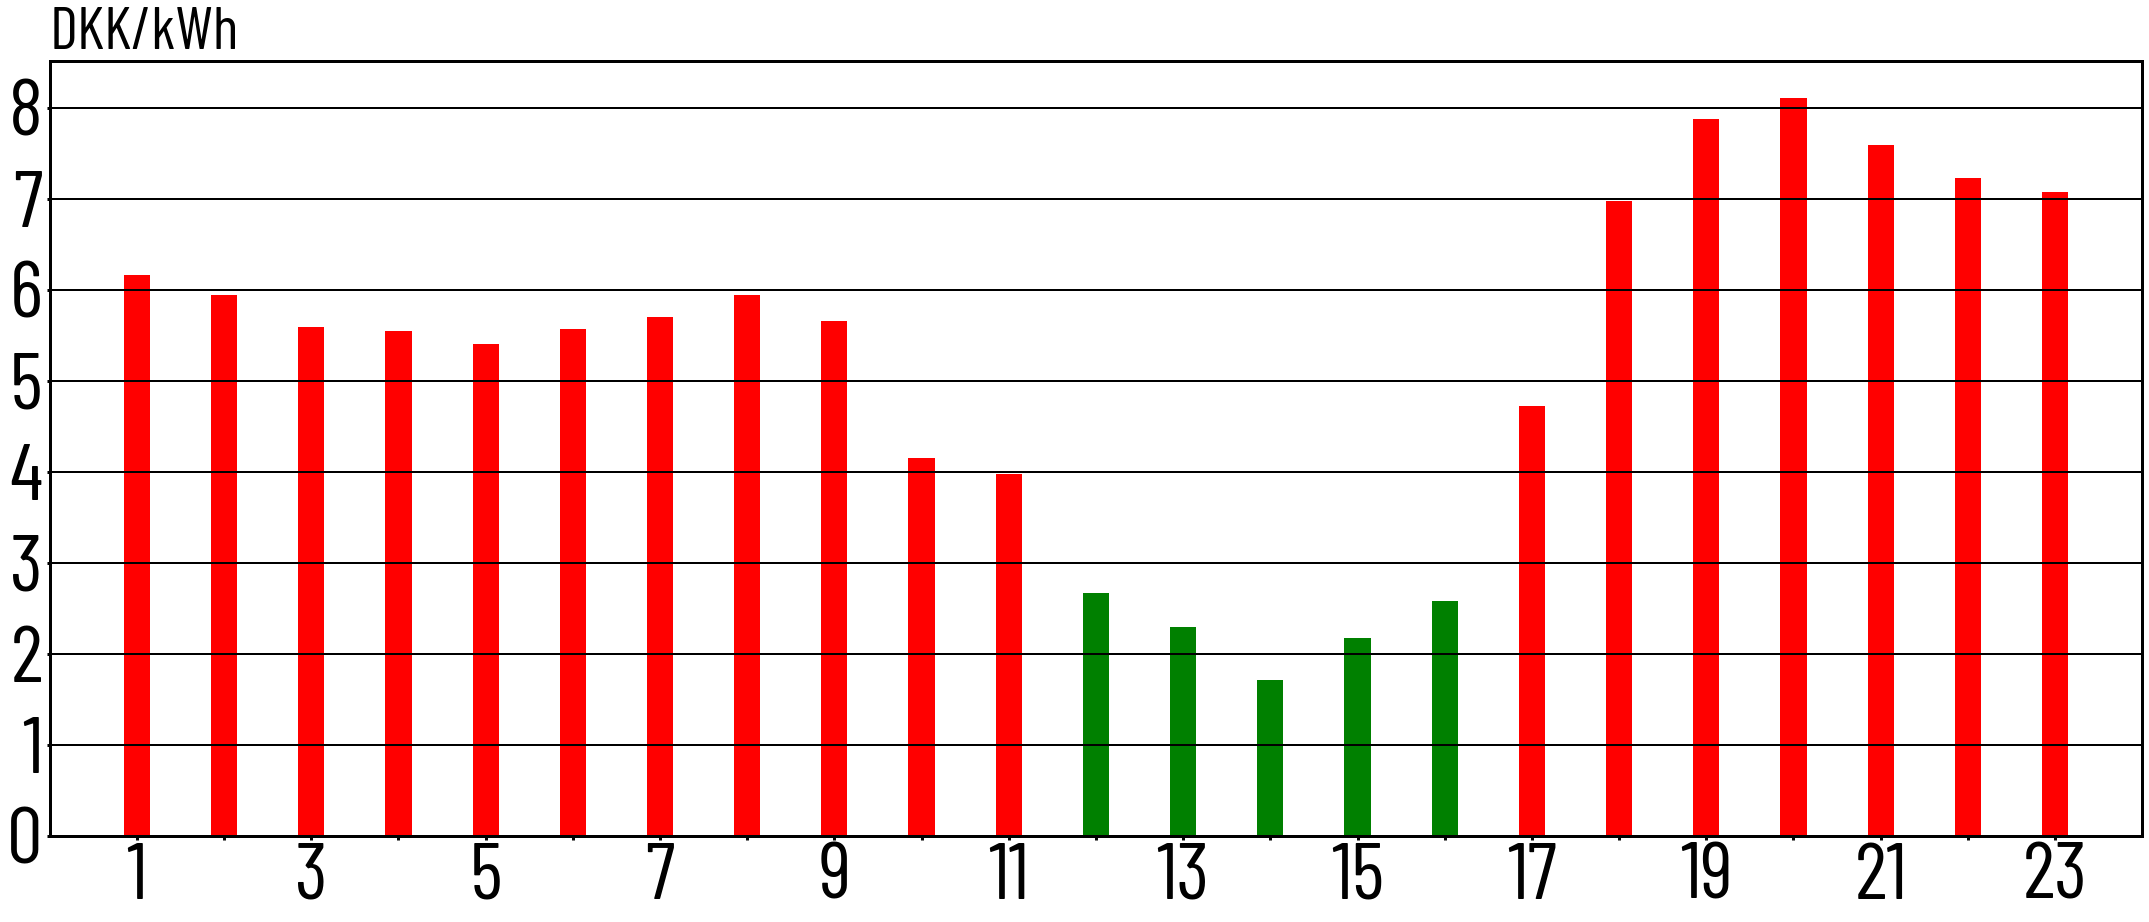

In [2]:
CONFIG_FILENAME = 'config.ini'
log.setup()
logger = logging.getLogger(__name__)
logger.info("App starting")
utils.check_python_version()
logger.info(f'Reading config file "{CONFIG_FILENAME}"')

inky = Inky()
with open(CONFIG_FILENAME) as f:
    config_parser = configparser.ConfigParser()
    config_parser.read_file(f)
    logger.info('Config: %s', config_parser.items('general'))
    config = config_parser['general']

    fonts = utils.get_fonts(config)
    images = get_weather_images()

    logger.info('Import epd control library')
    #panel_size = inky.resolution
    panel_size = (600, 448)
    #(epd_so, panel_size) = utils.get_epd_data(config)

    logger.info("Initial refresh")
    image = refresh.refresh(panel_size, fonts, images, config, inky, True)  # Once in the beginning
